In [1]:
import discretisedfield as df
import micromagneticmodel as mm
import oommfc as oc

In [ ]:
import sys
sys.path.append('..')
from simtools import Strip

In [2]:
l = 1500e-9
s = Strip(l, 100e-9, 10e-9, 20e-9, '.', initpattern='ixx')
s.min_drive(fixed=True, n_threads=64)
s.min_drive(n_threads=64)

Running OOMMF (ExeOOMMFRunner)[2023/07/12 12:14]... (81.9 s)
Running OOMMF (ExeOOMMFRunner)[2023/07/12 12:16]... (70.7 s)


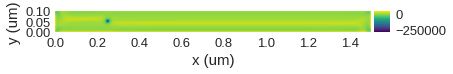

In [3]:
s.system.m.sel(z=1e-9).z.mpl()

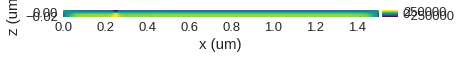

In [4]:
s.system.m.sel('y').z.mpl()

In [5]:
df.tools.count_bps(s.system.m)

{'bp_number': 1.0,
 'bp_number_hh': 1.0,
 'bp_number_tt': 0.0,
 'bp_pattern_x': '[[-0.0, 100], [-1.0, 500]]'}

In [6]:
s.system.dynamics += mm.ZhangLi(u=0, beta=0.56)

In [7]:
td = oc.TimeDriver()

In [8]:
muB = 9.274e-24

def J2ux(J, P=.5):
    Ms = mbp.Strip.FeGe['Ms']
    return J * P * mm.consts.g * muB / (2 * mm.consts.e * Ms)

In [10]:
import micromagneticdata as mdata

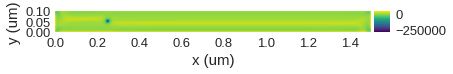

In [11]:
data = mdata.Data(name=s.system.name, dirname='.')
initial_m = data[-1][-1]
initial_m.sel(z=1e-9).z.mpl()

In [23]:
for j in [5e10, 1e11, 1.5e11, 2e11, 3e11, 5e11, 7e11, 1e12, 2e12]:
    # update current
    s.system.dynamics.zhangli.u = J2ux(j)
    
    # reset magnetisation
    s.system.m.array = initial_m.array

    if j in [1.5e11, 2e11]:  # very slow motion requires longer simulation time
        t = 60e-9
    else:
        t = 30e-9
    
    print(f"simulating {j=:g}\t{t=}")
    td.drive(s.system, dirname=f"simulations/J_{j:g}", t=10e-9, n=round(t * 1e9) * 100)

simulating j=5e+10	t=3e-08
simulating j=1e+11	t=3e-08
simulating j=1.5e+11	t=6e-08
simulating j=2e+11	t=6e-08
simulating j=3e+11	t=3e-08
simulating j=5e+11	t=3e-08
simulating j=7e+11	t=3e-08
simulating j=1e+12	t=3e-08
simulating j=2e+12	t=3e-08
